In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

In [3]:
tokenizer = Tokenizer()

In [4]:
data = open('data/sonnets.txt').read()

corpus = data.lower().split("\n")

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [15]:
np.add(13,3)

16

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.9118 - accuracy: 0.0212
Epoch 2/100
15462/15462 [==============================] - 36s 2ms/sample - loss: 6.4927 - accuracy: 0.0221
Epoch 3/100
15462/15462 [==============================] - 36s 2ms/sample - loss: 6.3970 - accuracy: 0.0246
Epoch 4/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.2815 - accuracy: 0.0314
Epoch 5/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 6.1715 - accuracy: 0.0376
Epoch 6/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.0839 - accuracy: 0.0389
Epoch 7/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 5.9994 - accuracy: 0.0414
Epoch 8/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 5.9154 - accuracy: 0.0470
Epoch 9/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 5.8149 - accuracy: 0.0530
Epoch

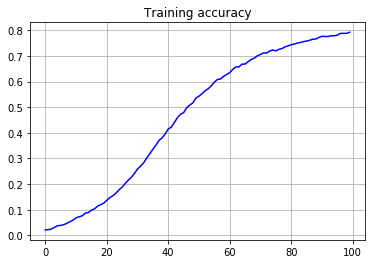

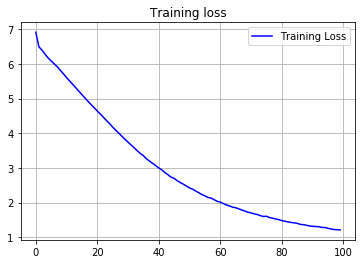

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = model.history.history['accuracy']
loss = model.history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.grid()
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of their sum state and sit go hate of so go used doth pride age o'er write shame near so 'no prove days so one ill well strong tomb so used tongue hold decay bear decay dote stand words than living too out out him of men too cold away so skill hour new skill skill near new birth to be and so precious things or words so skill days stay press none days than told so tell so so wantonness confounds them so they have say you strong woe best hate ' out so turn'd tomb a rondure hems
